In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
assets_dir = '../Assets/'

In [2]:
def histogram_equalization(img_channel):
    h, w = img_channel.shape
    tot_pixels = h * w
    L = 256

    histogram = cv2.calcHist([img_channel], [0], None, [L], [0, L]).flatten()
    pdf = histogram / tot_pixels
    cdf = np.cumsum(pdf)
    equalized_channel = np.zeros_like(img_channel)
    equalized_channel = cv2.LUT(img_channel, np.floor(cdf * (L - 1)).astype(np.uint8))
    
    new_histogram = cv2.calcHist([equalized_channel], [0], None, [L], [0, L]).flatten()
    new_pdf = new_histogram / tot_pixels
    new_cdf = np.cumsum(new_pdf)
    
    return equalized_channel, histogram, pdf, cdf, new_histogram, new_pdf, new_cdf

In [4]:
img = cv2.imread(assets_dir + 'generic/land_1.jpg')
b, g, r = cv2.split(img)
b_eq, b_hist, b_pdf, b_cdf, b_new_hist, b_new_pdf, b_new_cdf = histogram_equalization(b)
g_eq, g_hist, g_pdf, g_cdf, g_new_hist, g_new_pdf, g_new_cdf = histogram_equalization(g)
r_eq, r_hist, r_pdf, r_cdf, r_new_hist, r_new_pdf, r_new_cdf = histogram_equalization(r)
equalized_img = cv2.merge((b_eq, g_eq, r_eq))

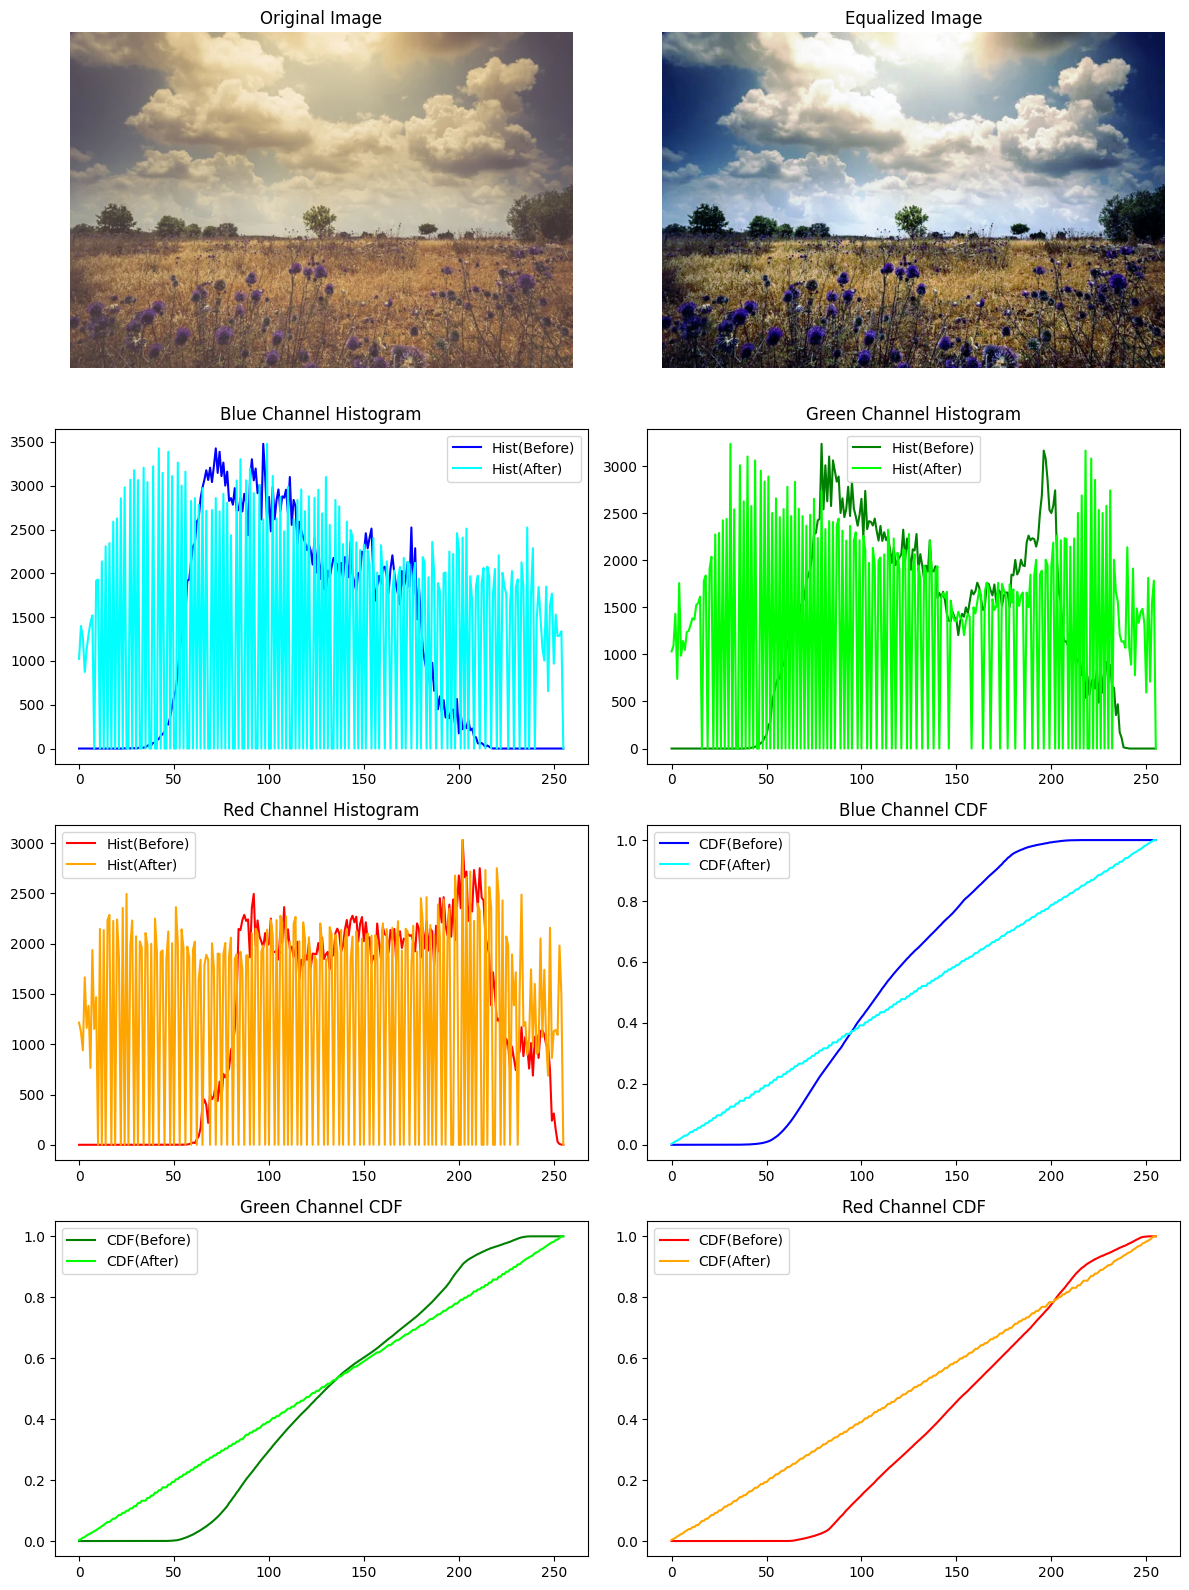

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

axs[1, 0].plot(b_hist, color='blue', label='Hist(Before)')
axs[1, 0].plot(b_new_hist, color='cyan', label='Hist(After)')
axs[1, 0].set_title('Blue Channel Histogram')
axs[1, 0].legend()

axs[1, 1].plot(g_hist, color='green', label='Hist(Before)')
axs[1, 1].plot(g_new_hist, color='lime', label='Hist(After)')
axs[1, 1].set_title('Green Channel Histogram')
axs[1, 1].legend()

axs[2, 0].plot(r_hist, color='red', label='Hist(Before)')
axs[2, 0].plot(r_new_hist, color='orange', label='Hist(After)')
axs[2, 0].set_title('Red Channel Histogram')
axs[2, 0].legend()

axs[2, 1].plot(b_cdf, color='blue', label='CDF(Before)')
axs[2, 1].plot(b_new_cdf, color='cyan', label='CDF(After)')
axs[2, 1].set_title('Blue Channel CDF')
axs[2, 1].legend()

axs[3, 0].plot(g_cdf, color='green', label='CDF(Before)')
axs[3, 0].plot(g_new_cdf, color='lime', label='CDF(After)')
axs[3, 0].set_title('Green Channel CDF')
axs[3, 0].legend()

axs[3, 1].plot(r_cdf, color='red', label='CDF(Before)')
axs[3, 1].plot(r_new_cdf, color='orange', label='CDF(After)')
axs[3, 1].set_title('Red Channel CDF')
axs[3, 1].legend()

fig.tight_layout()
plt.show()

